In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Import the data

This census data comes from a 1994 census found [here](http://archive.ics.uci.edu/ml/datasets/Adult)

In [2]:
df = pd.read_csv('datasets/census_data.csv')
df.head()

,age,workclass,education,ednum,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_dummy
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


# Univariate Plotting in Seaborn

Using Seaborn's [`distplot`](https://seaborn.pydata.org/generated/seaborn.distplot.html)

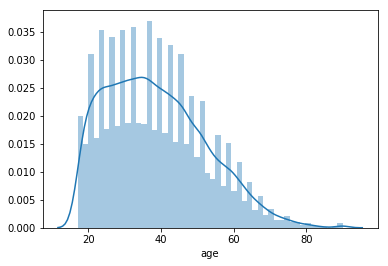

In [3]:
sns.distplot(df['age'])

Sometimes we want the full distribution and not the [Kernel Density Estimate](https://en.wikipedia.org/wiki/Kernel_density_estimation)

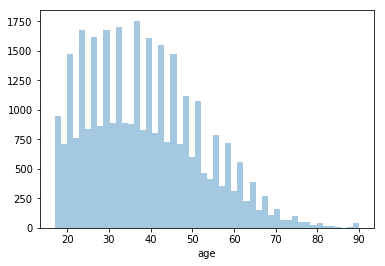

In [4]:
sns.distplot(df['age'], kde=False)

Notice the scale of the y-axis changing to counts of actual occurances!

_Side note_: Why do we see such peaky occurances of specific ages?

Using Seaborn's [barplot](https://seaborn.pydata.org/generated/seaborn.barplot.html)

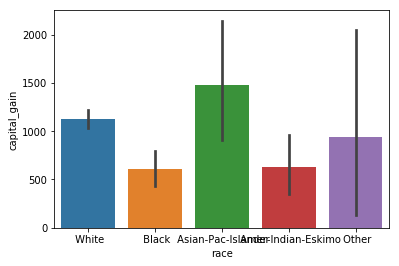

In [5]:
sns.barplot(x='race', y='capital_gain', data=df)

_Using two categories_

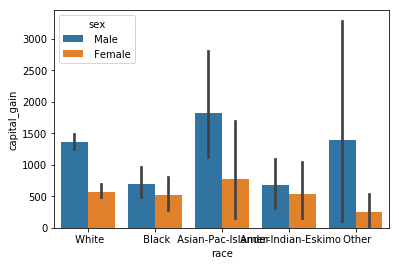

In [6]:
sns.barplot(x='race', y='capital_gain', hue='sex', data=df)

_Compare this to `matplotlib`_

In [7]:
races = df['race'].unique()
averages = [df.loc[(df['race'] == race), 'capital_gain'].mean() for race in races]
print(races, averages)

[' White' ' Black' ' Asian-Pac-Islander' ' Amer-Indian-Eskimo' ' Other'] [1121.6603753235547, 609.9404609475032, 1478.3580365736284, 625.2668810289389, 934.6605166051661]


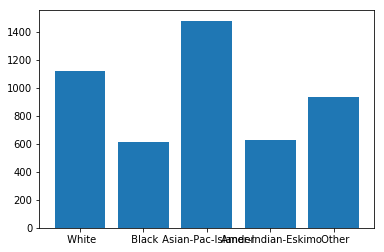

In [8]:
ax = plt.subplot()
ax.bar(range(len(averages)), averages)
ax.set_xticks(range(len(averages)))
ax.set_xticklabels(races)
plt.show()

# Bivariate Plotting in Seaborn

Using Seaborn's [heatmap](https://seaborn.pydata.org/generated/seaborn.heatmap.html)

This style of plotting is best used to help visualize a dense table of information, such as a correlation table

In [9]:
df.head()

,age,workclass,education,ednum,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_dummy
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [10]:
df['over50k'] = df['income_dummy'].apply(lambda x: 1 if x == ' >50K' else 0)
corr_df = df[['age', 'ednum', 'capital_gain', 'capital_loss', 'hours_per_week', 'over50k']].corr()
corr_df

,age,ednum,capital_gain,capital_loss,hours_per_week,over50k
age,1.000000,0.036527,0.077674,0.057775,0.068756,0.234037
ednum,0.036527,1.000000,0.122630,0.079923,0.148123,0.335154
capital_gain,0.077674,0.122630,1.000000,-0.031615,0.078409,0.223329
capital_loss,0.057775,0.079923,-0.031615,1.000000,0.054256,0.150526
hours_per_week,0.068756,0.148123,0.078409,0.054256,1.000000,0.229689
over50k,0.234037,0.335154,0.223329,0.150526,0.229689,1.000000


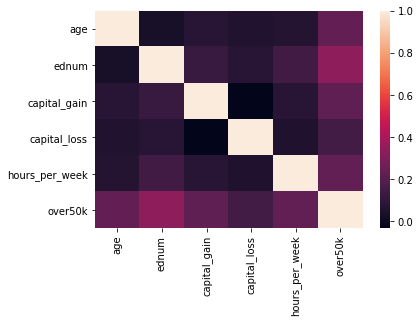

In [11]:
sns.heatmap(corr_df)

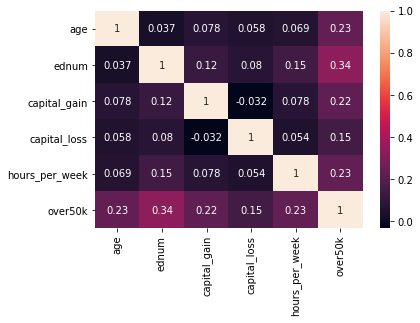

In [12]:
sns.heatmap(corr_df, annot=True)

_Extra bonus_: How to plot half of the correlation heat map

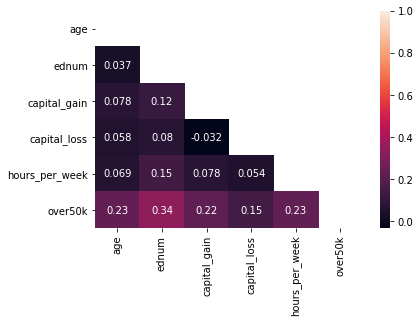

In [13]:
mask = np.zeros_like(corr_df, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr_df, annot=True, mask=mask)

Using Seaborn's [boxplot](https://seaborn.pydata.org/generated/seaborn.boxplot.html)

_Univariate Distribution_

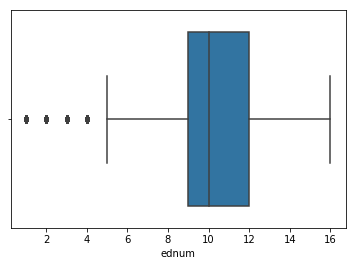

In [14]:
sns.boxplot(df['ednum'])

_Grouped by a categorical variable_

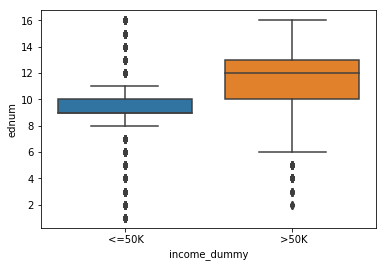

In [15]:
sns.boxplot(x='income_dummy', y='ednum', data=df)

_Grouped by *two* categorical variables_

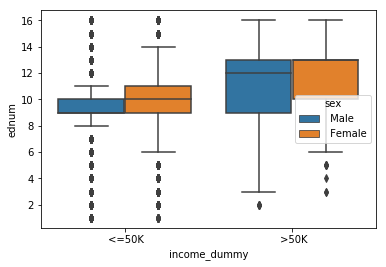

In [16]:
sns.boxplot(x='income_dummy', y='ednum', hue='sex', data=df)

Using Seaborn's [violin plots](https://seaborn.pydata.org/generated/seaborn.violinplot.html) to do the same thing

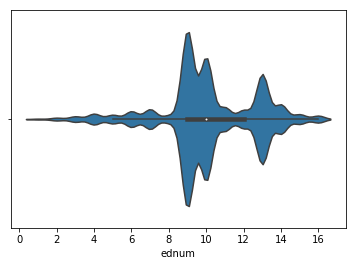

In [17]:
sns.violinplot(df['ednum'])

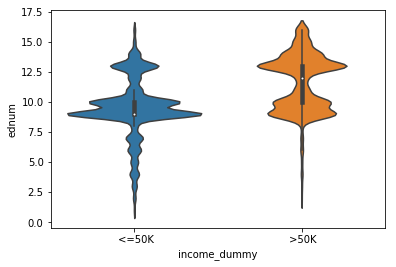

In [18]:
sns.violinplot(x='income_dummy', y='ednum', data=df)

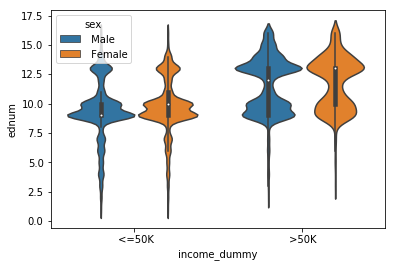

In [19]:
sns.violinplot(x='income_dummy', y='ednum', hue='sex', data=df)

Using Seaborn's [pairplot](https://seaborn.pydata.org/generated/seaborn.pairplot.html)

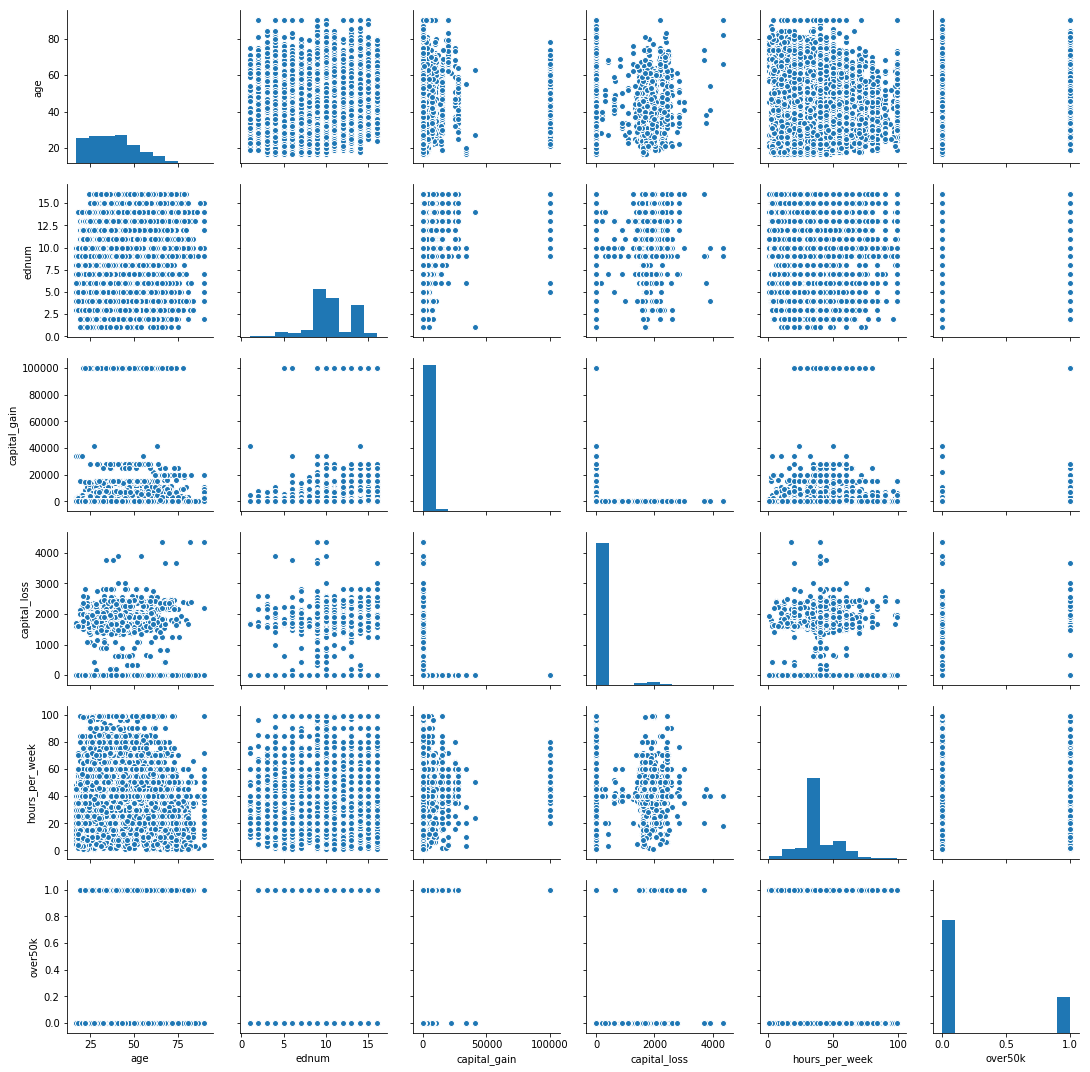

In [20]:
sns.pairplot(df[['age', 'ednum', 'capital_gain', 'capital_loss', 'hours_per_week', 'over50k']])

Using Seaborn's [jointplot](https://seaborn.pydata.org/generated/seaborn.jointplot.html)

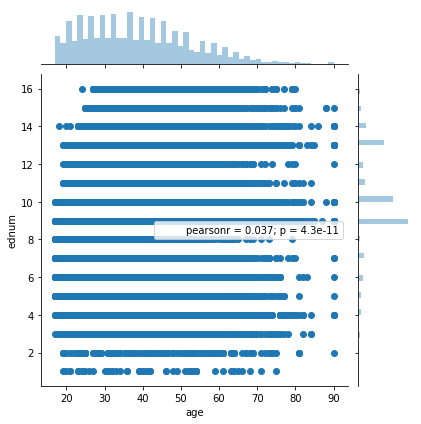

In [21]:
sns.jointplot(x='age', y='ednum', data=df)

Using `kind='kde'` or `kind='hex'` can help with densly packed data

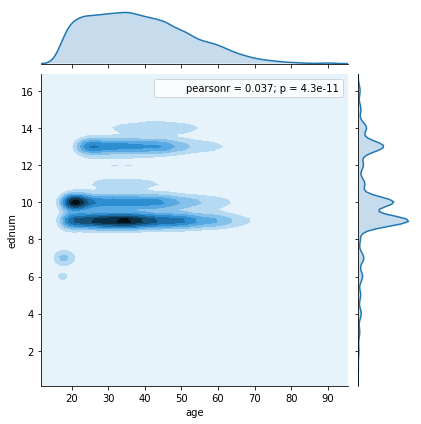

In [22]:
sns.jointplot(x='age', y='ednum', data=df, kind='kde')

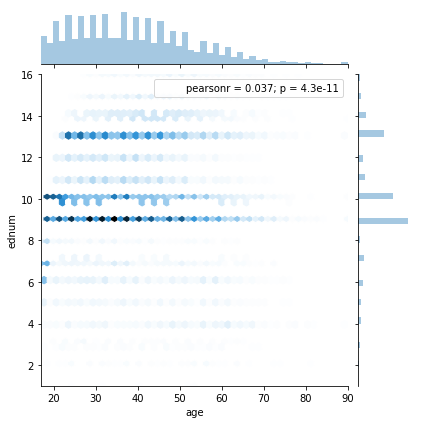

In [23]:
sns.jointplot(x='age', y='ednum', data=df, kind='hex')